In [1]:
import pandas as pd
from selenium import webdriver
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import requests                         
import json
import csv



In [2]:
# using selenium to scrape webpage for data.

base_url =("https://www.dallasopendata.com/City-Services/FY2020-Dallas-Animal-Shelter-Data/7h2m-3um5")
driver = webdriver.Firefox()
driver.get(base_url)

In [3]:
# pulling data specific element from the webpage using xpath.

element= driver.find_element_by_xpath('/html/body/main/div/div[1]/div/div[2]/section[4]/div[2]/div/div/div[5]/div[1]/div')

In [4]:
element_html= element.get_attribute('innerHTML')          # using the get attribute to get html information

In [5]:
df_webpage= pd.read_html(element_html)[0]                    # using pandas to read html in a more readable format.

In [6]:
df_webpage = pd.DataFrame(df_webpage)

In [7]:
                                                                  # Dropping columns that are not needed.

df_webpage.drop('Additional Information', axis=1, inplace=True) 
df_webpage.drop('Receipt Number', axis=1, inplace=True)
df_webpage.drop('Tag Type', axis=1, inplace=True)
df_webpage.drop('Activity Number', axis=1, inplace=True)
df_webpage.drop('Service Request Number', axis=1, inplace=True)
df_webpage.drop('Hold Request', axis=1, inplace=True)


In [8]:
df_webpage.rename(columns = {'Reason':'Surrender Reason'}, inplace = True)   # formatting column names
df_webpage.rename(columns = {'Intake Time':'Intake_Hour'}, inplace = True)

In [9]:
df_webpage = df_webpage.drop_duplicates()                          # dropping duplicate rows.
duplicate_rows = df_webpage[df_webpage.duplicated()]                            
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (0, 28)


In [10]:
df_webpage = df_webpage.dropna(how='all')                                      # dropping rows with all null values

In [11]:
print(df_webpage.isnull().sum())       # checking for null values in dataset.

Animal Id            0
Animal Type          0
Animal Breed         0
Kennel Number        0
Kennel Status        0
Activity Sequence    0
Source Id            0
Census Tract         0
Council District     0
Intake Type          0
Intake Subtype       0
Intake Total         0
Surrender Reason     0
Staff Id             0
Intake Date          0
Intake_Hour          0
Due Out              0
Intake Condition     0
Outcome Type         0
Outcome Subtype      0
Outcome Date         0
Outcome Time         0
Impound Number       0
Outcome Condition    0
Chip Status          0
Animal Origin        0
Month                0
Year                 0
dtype: int64


In [12]:
df_webpage.describe()                  # overall numerical columns spread

,Activity Sequence,Census Tract,Council District,Intake Total
count,13.0,13.000000,13.000000,13.0
mean,1.0,9132.000000,4.846154,1.0
std,0.0,4890.088053,3.362691,0.0
min,1.0,1400.000000,1.000000,1.0
25%,1.0,6900.000000,4.000000,1.0
50%,1.0,8701.000000,4.000000,1.0
75%,1.0,9303.000000,5.000000,1.0
max,1.0,20500.000000,14.000000,1.0


In [13]:
df_webpage.dtypes                        

Animal Id            object
Animal Type          object
Animal Breed         object
Kennel Number        object
Kennel Status        object
Activity Sequence     int64
Source Id            object
Census Tract          int64
Council District      int64
Intake Type          object
Intake Subtype       object
Intake Total          int64
Surrender Reason     object
Staff Id             object
Intake Date          object
Intake_Hour          object
Due Out              object
Intake Condition     object
Outcome Type         object
Outcome Subtype      object
Outcome Date         object
Outcome Time         object
Impound Number       object
Outcome Condition    object
Chip Status          object
Animal Origin        object
Month                object
Year                 object
dtype: object

In [14]:
data_not_clean = pd.read_csv("animal_csv.csv")

In [15]:
data_not_clean = pd.DataFrame(data_not_clean)

In [16]:
data_not_clean.info()               # appears everything came across ok, column types, header appear ok. no modification needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null int64
dob_year                      79672 non-null int64
dob_month   

In [17]:
to_drop = ['outcome_weekday','sex_upon_outcome',  'age_upon_intake_(days)', 'outcome_subtype', 'dob_year', 'dob_month','age_upon_outcome_age_group', 'outcome_month', 'outcome_year', 'outcome_hour', 'outcome_number' ]          # removing some unnecessary columns.
data_not_clean.drop(to_drop, inplace= True, axis=1 )

In [18]:
print(data_not_clean.isnull().sum())                     # checking how many null values are present. 

age_upon_outcome              0
animal_id_outcome             0
date_of_birth                 0
outcome_type                 10
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
outcome_datetime              0
outcome_monthyear             0
dob_monthyear                 0
age_upon_intake               0
animal_id_intake              0
animal_type                   0
breed                         0
color                         0
found_location                0
intake_condition              0
intake_type                   0
sex_upon_intake               1
count                         0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
dtype: int64


In [19]:
df_csv=data_not_clean.dropna(axis=0)                                      # seeing how many duplicate rows are present.
duplicate_rows = df_csv[df_csv.duplicated()]                            # and dropping null values.
print("number of duplicate rows:", duplicate_rows.shape)


number of duplicate rows: (35, 30)


In [20]:
print(df_csv.isnull().sum())       # see no more null values in dataset.

age_upon_outcome             0
animal_id_outcome            0
date_of_birth                0
outcome_type                 0
age_upon_outcome_(days)      0
age_upon_outcome_(years)     0
outcome_datetime             0
outcome_monthyear            0
dob_monthyear                0
age_upon_intake              0
animal_id_intake             0
animal_type                  0
breed                        0
color                        0
found_location               0
intake_condition             0
intake_type                  0
sex_upon_intake              0
count                        0
age_upon_intake_(years)      0
age_upon_intake_age_group    0
intake_datetime              0
intake_month                 0
intake_year                  0
intake_monthyear             0
intake_weekday               0
intake_hour                  0
intake_number                0
time_in_shelter              0
time_in_shelter_days         0
dtype: int64


In [21]:
df_csv = df_csv.drop_duplicates()                                        # dropping duplicate rows
duplicate_rows = df_csv[df_csv.duplicated()]                            
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (0, 30)


In [22]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79626 entries, 0 to 79671
Data columns (total 30 columns):
age_upon_outcome             79626 non-null object
animal_id_outcome            79626 non-null object
date_of_birth                79626 non-null object
outcome_type                 79626 non-null object
age_upon_outcome_(days)      79626 non-null int64
age_upon_outcome_(years)     79626 non-null float64
outcome_datetime             79626 non-null object
outcome_monthyear            79626 non-null object
dob_monthyear                79626 non-null object
age_upon_intake              79626 non-null object
animal_id_intake             79626 non-null object
animal_type                  79626 non-null object
breed                        79626 non-null object
color                        79626 non-null object
found_location               79626 non-null object
intake_condition             79626 non-null object
intake_type                  79626 non-null object
sex_upon_intake         

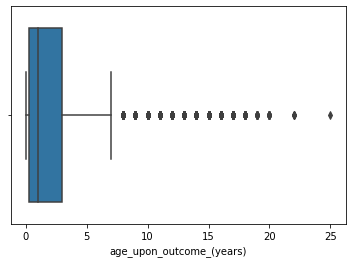

In [23]:
sns.boxplot(df_csv['age_upon_outcome_(years)'])             # checking age box plot for outliers


In [24]:
df_csv = df_csv[(df_csv['age_upon_outcome_(years)'] <= 20)]    # removing possible outliers of ages greater than 20


In [25]:
df_csv.rename(columns = {'age_upon_outcome_(years)':'Outcome Age(years)'}, inplace = True)   # formatting column names
df_csv.rename(columns = {'age_upon_outcome_(days)':'Outcome Age(days)'}, inplace = True)      
df_csv.rename(columns = {'animal_id_outcome':'Animal Id'}, inplace = True)
df_csv.rename(columns = {'animal_type':'Animal Type'}, inplace = True)
df_csv.rename(columns = {'breed':'Animal Breed'}, inplace = True)
df_csv.rename(columns = {'intake_type':'Intake Type'}, inplace = True)
df_csv.rename(columns = {'outcome_monthyear':'Outcome Date'}, inplace = True)
df_csv.rename(columns = {'dob_monthyear':'Birthdate'}, inplace = True)
df_csv.rename(columns = {'count':'Count'}, inplace = True)
df_csv.rename(columns = {'age_upon_intake_(years)':'Intake Age(year)'}, inplace = True)
df_csv.rename(columns = {'intake_month':'Intake Month'}, inplace = True)
df_csv.rename(columns = {'intake_year':'Year'}, inplace = True)
df_csv.rename(columns = {'intake_hour':'Intake Hour'}, inplace = True)
df_csv.rename(columns = {'intake_number':'Intake Number'}, inplace = True)
df_csv.rename(columns = {'time_in_shelter_days':'Time in Shelter(days)'}, inplace = True)
df_csv.rename(columns = {'color':'Color'}, inplace = True)
df_csv.rename(columns = {'Intake Age(year)':'Intake Age(years)'}, inplace = True)
df_csv.rename(columns = {'sex_upon_intake':'Sex'}, inplace = True)

In [26]:
df_csv.describe()        # overall spread appears ok, no glaring error noticed.

,Outcome Age(days),Outcome Age(years),Count,Intake Age(years),Intake Month,Year,Intake Hour,Intake Number,Time in Shelter(days)
count,79621.000000,79621.000000,79621.0,79621.000000,79621.000000,79621.000000,79621.000000,79621.000000,79621.000000
mean,781.656711,2.141525,1.0,2.106691,6.584846,2015.435651,13.487434,1.126776,16.759942
std,1057.037852,2.895994,0.0,2.889068,3.366532,1.302894,3.121573,0.456006,41.681406
min,0.000000,0.000000,1.0,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,1.0,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102778
50%,365.000000,1.000000,1.0,1.000000,7.000000,2015.000000,13.000000,1.000000,4.988194
75%,1095.000000,3.000000,1.0,3.000000,10.000000,2017.000000,16.000000,1.000000,13.650694
max,7300.000000,20.000000,1.0,20.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


In [27]:
df_csv.info()                       # data types are acceptable 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79621 entries, 0 to 79671
Data columns (total 30 columns):
age_upon_outcome             79621 non-null object
Animal Id                    79621 non-null object
date_of_birth                79621 non-null object
outcome_type                 79621 non-null object
Outcome Age(days)            79621 non-null int64
Outcome Age(years)           79621 non-null float64
outcome_datetime             79621 non-null object
Outcome Date                 79621 non-null object
Birthdate                    79621 non-null object
age_upon_intake              79621 non-null object
animal_id_intake             79621 non-null object
Animal Type                  79621 non-null object
Animal Breed                 79621 non-null object
Color                        79621 non-null object
found_location               79621 non-null object
intake_condition             79621 non-null object
Intake Type                  79621 non-null object
Sex                     

In [28]:
df_api = pd.read_json("https://data.sonomacounty.ca.gov/resource/924a-vesw.json")  # loading endpoint api from webpage into pandas.
df_api= pd.DataFrame(df_api)                                                       # converting into pandas dataframe

In [29]:
df_api.head()

,name,type,breed,color,sex,size,impound_number,kennel_number,id,intake_date,...,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total,:@computed_region_dig5_f3vy,date_of_birth
0,SKY,DOG,GERM SHEPHERD,BLACK/TAN,Female,MED,K20-035118,DS69,A395686,2020-01-19T00:00:00.000,...,OVER THE COUNTER_CALL,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"{'latitude': '38.458384', 'longitude': '-122.6...",1,26080.0,NaN
1,COCO,DOG,BEAGLE,TRICOLOR,Neutered,SMALL,K17-025093,DS83,A379968,2017-08-30T00:00:00.000,...,NC AN FRND,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,95758.0,"{'latitude': '38.424655', 'longitude': '-121.4...",1,12873.0,2015-04-06T00:00:00.000
2,SUZIE,DOG,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,K15-012348,DA34,A315553,2015-01-07T00:00:00.000,...,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"{'latitude': '38.458384', 'longitude': '-122.6...",1,26080.0,2011-01-23T00:00:00.000
3,BUBBLES,DOG,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,K20-035635,DS52,A363110,2020-03-20T00:00:00.000,...,DOGMA,UNKNOWN,PENDING,WINDSOR,COUNTY,95462.0,"{'latitude': '38.468829', 'longitude': '-123.0...",1,31029.0,2017-04-28T00:00:00.000
4,FELIX,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,K18-029084,LOBBY,A374683,2018-07-12T00:00:00.000,...,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"{'latitude': '38.403734', 'longitude': '-122.7...",1,26079.0,2018-05-12T00:00:00.000


In [30]:
df_api.shape

(1000, 25)

In [31]:
df_api.drop('outcome_jurisdiction', axis=1, inplace=True)   # Dropping columns that are not needed.
df_api.drop('intake_jurisdiction', axis=1, inplace=True)
df_api.drop(':@computed_region_dig5_f3vy', axis=1, inplace=True)
df_api.drop('outcome_subtype', axis=1, inplace=True)
df_api.drop('zip_code', axis=1, inplace=True)
df_api.drop('size', axis=1, inplace=True)
df_api.drop('impound_number', axis=1, inplace=True)
df_api.drop('location', axis=1, inplace=True)
df_api.drop('name', axis=1, inplace=True)
df_api.drop('intake_subtype', axis=1, inplace=True)

In [32]:
print(df_api.isnull().sum())           #checking number of null values in dataset   


type                   0
breed                  0
color                  0
sex                    0
kennel_number          2
id                     0
intake_date            0
outcome_date           7
days_in_shelter        0
intake_type            0
outcome_type           7
intake_condition       0
outcome_condition     35
intake_total           0
date_of_birth        245
dtype: int64


In [33]:
df_api=df_api.dropna(axis=0)        # dropping null values         

In [34]:
print(df_api.isnull().sum())        # ensuring null values are removed

type                 0
breed                0
color                0
sex                  0
kennel_number        0
id                   0
intake_date          0
outcome_date         0
days_in_shelter      0
intake_type          0
outcome_type         0
intake_condition     0
outcome_condition    0
intake_total         0
date_of_birth        0
dtype: int64


In [35]:
df_api = df_api.drop_duplicates()                                        # dropping duplicate rows
duplicate_rows = df_api[df_api.duplicated()]                            
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (0, 15)


In [36]:
df_api.rename(columns = {'id':'Animal Id'}, inplace = True)              # formatting column names
df_api.rename(columns = {'type':'Animal Type'}, inplace = True)
df_api.rename(columns = {'breed':'Animal Breed'}, inplace = True)   
df_api.rename(columns = {'intake_date':'Intake Date'}, inplace = True)
df_api.rename(columns = {'id':'Animal Id'}, inplace = True)   
df_api.rename(columns = {'outcome_date':'Outcome Date'}, inplace = True)  
df_api.rename(columns = {'outcome_type':'Outcome Type'}, inplace = True)
df_api.rename(columns = {'kennel_number':'Kennel Number'}, inplace = True)
df_api.rename(columns = {'name':'Name'}, inplace = True)
df_api.rename(columns = {'color':'Color'}, inplace = True)
df_api.rename(columns = {'sex':'Sex'}, inplace = True)
df_api.rename(columns = {'location':'Location'}, inplace = True)
df_api.rename(columns = {'date_of_birth':'Birthdate'}, inplace = True)
df_api.rename(columns = {'days_in_shelter':'Days in Shelter'}, inplace = True)
df_api.rename(columns = {'intake_condition':'Intake Condition'}, inplace = True)
df_api.rename(columns = {'outcome_condition':'Outcome Condition'}, inplace = True)
df_api.rename(columns = {'intake_total':'Intake Total'}, inplace = True)
df_api.rename(columns = {'intake_type':'Intake Type'}, inplace = True)

In [37]:
df_api.describe()      # spread looks ok, majority of data is non numerical and the numerical values don't show

,Days in Shelter,Intake Total
count,741.000000,741.000000
mean,20.546559,0.991903
std,58.151824,0.089680
min,0.000000,0.000000
25%,2.000000,1.000000
50%,10.000000,1.000000
75%,23.000000,1.000000
max,891.000000,1.000000


In [38]:
df_api.dtypes   

Animal Type          object
Animal Breed         object
Color                object
Sex                  object
Kennel Number        object
Animal Id            object
Intake Date          object
Outcome Date         object
Days in Shelter       int64
Intake Type          object
Outcome Type         object
Intake Condition     object
Outcome Condition    object
Intake Total          int64
Birthdate            object
dtype: object

In [39]:
# merging all three datasets

df_final = pd.concat([df_api, df_webpage, df_csv], ignore_index= True)

C:\Users\EF\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
df_final = df_final.replace('male', 'Male')          # touching up some inconsistent characters
df_final = df_final.replace('female', 'Female')
df_final = df_final.replace('Spayed', 'Female')
df_final = df_final.replace('Neutered', 'Male')
df_final = df_final.replace('DOG', 'Dog')
df_final = df_final.replace('CAT', 'Cat')
df_final = df_final.replace('OTHER', 'Other')
df_final = df_final.replace('Intake Year', 'Year')
df_final = df_final.replace('FY2020', '2020')
df_final = df_final.replace('Intact Female', 'Female')
df_final = df_final.replace('Intact Male', 'Male')
df_final = df_final.replace('Neutered Male', 'Male')
df_final = df_final.replace('Spayed Female', 'Female')



In [41]:
df_final.dtypes

Activity Sequence            float64
Animal Breed                  object
Animal Id                     object
Animal Origin                 object
Animal Type                   object
Birthdate                     object
Census Tract                 float64
Chip Status                   object
Color                         object
Council District             float64
Count                        float64
Days in Shelter              float64
Due Out                       object
Impound Number                object
Intake Age(years)            float64
Intake Condition              object
Intake Date                   object
Intake Hour                  float64
Intake Month                 float64
Intake Number                float64
Intake Subtype                object
Intake Total                 float64
Intake Type                   object
Intake_Hour                   object
Kennel Number                 object
Kennel Status                 object
Month                         object
O

In [42]:
engine = create_engine('sqlite:///DSC540.db', echo=True)           # create sql engine and connection
sqlite_connection = engine.connect()

2020-05-25 19:36:35,149 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-25 19:36:35,159 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:36:35,159 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-25 19:36:35,169 INFO sqlalchemy.engine.base.Engine ()


In [43]:
sqlite_table = "shelter data"                                 # creating table of my data set in sql.
df_final.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-05-25 19:36:39,063 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("shelter data")
2020-05-25 19:36:39,063 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:36:39,076 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("shelter data")
2020-05-25 19:36:39,076 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:36:39,137 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "shelter data" (
	"index" BIGINT, 
	"Activity Sequence" FLOAT, 
	"Animal Breed" TEXT, 
	"Animal Id" TEXT, 
	"Animal Origin" TEXT, 
	"Animal Type" TEXT, 
	"Birthdate" TEXT, 
	"Census Tract" FLOAT, 
	"Chip Status" TEXT, 
	"Color" TEXT, 
	"Council District" FLOAT, 
	"Count" FLOAT, 
	"Days in Shelter" FLOAT, 
	"Due Out" TEXT, 
	"Impound Number" TEXT, 
	"Intake Age(years)" FLOAT, 
	"Intake Condition" TEXT, 
	"Intake Date" TEXT, 
	"Intake Hour" FLOAT, 
	"Intake Month" FLOAT, 
	"Intake Number" FLOAT, 
	"Intake Subtype" TEXT, 
	"Intake Total" FLOAT, 
	"Intake Type" TEXT, 
	"Intake_Hour" TEXT, 
	"Kennel Numbe

In [44]:
sql_df = pd.read_sql_table("shelter data",               # reading sql table from db in pandas
                           con=engine)

2020-05-25 19:37:22,635 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-05-25 19:37:22,642 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:37:22,667 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-05-25 19:37:22,674 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:37:22,715 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("shelter data")
2020-05-25 19:37:22,755 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:37:22,871 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'shelter data' AND type = 'table'
2020-05-25 19:37:22,879 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:37:22,893 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("shelter data")
2020-05-25 19:37:22,898 INFO sqlalchemy.engine.base.Engine ()
2020-05-25 19:37:22,903 INFO sqlalchemy.engin

In [45]:
sql_df.head()

,index,Activity Sequence,Animal Breed,Animal Id,Animal Origin,Animal Type,Birthdate,Census Tract,Chip Status,Color,...,animal_id_intake,date_of_birth,found_location,intake_condition,intake_datetime,intake_monthyear,intake_weekday,outcome_datetime,outcome_type,time_in_shelter
0,0,NaN,BEAGLE,A379968,None,Dog,2015-04-06T00:00:00.000,NaN,None,TRICOLOR,...,None,None,None,None,None,None,None,None,None,None
1,1,NaN,LABRADOR RETR/MIX,A315553,None,Dog,2011-01-23T00:00:00.000,NaN,None,BLACK,...,None,None,None,None,None,None,None,None,None,None
2,2,NaN,FOX TERR SMOOTH/MIX,A363110,None,Dog,2017-04-28T00:00:00.000,NaN,None,TAN,...,None,None,None,None,None,None,None,None,None,None
3,3,NaN,DOMESTIC SH,A374683,None,Cat,2018-05-12T00:00:00.000,NaN,None,BLACK,...,None,None,None,None,None,None,None,None,None,None
4,4,NaN,GERM SHEPHERD,A395721,None,Dog,2017-01-22T00:00:00.000,NaN,None,BROWN/BLACK,...,None,None,None,None,None,None,None,None,None,None


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

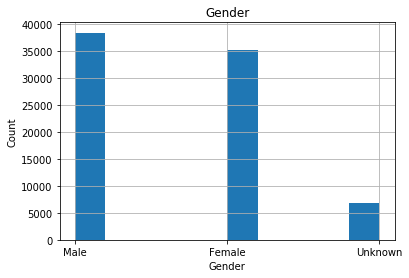

In [46]:
# Histogram of gender

status = sql_df['Sex']
status.hist()
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

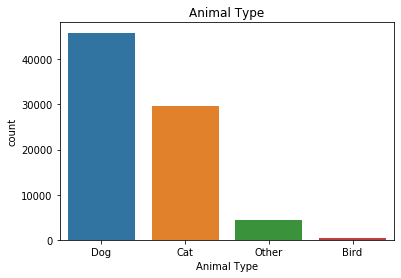

In [47]:
sns.countplot(sql_df['Animal Type'])  # Graph of animal type
plt.title('Animal Type')
plt.plot

Text(0.5, 1.0, 'Chip Status')

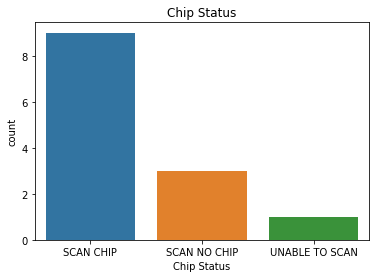

In [48]:
sns.countplot(sql_df['Chip Status'])# Graph of chip status
plt.title('Chip Status')

Text(0.5, 1.0, 'Total count by Year')

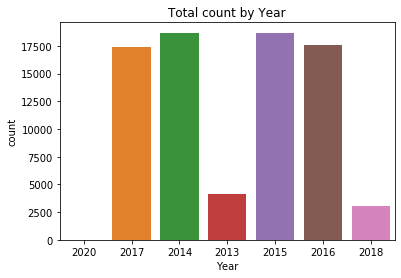

In [49]:
sns.countplot(sql_df['Year'])# Graph of total count by year
plt.title('Total count by Year')

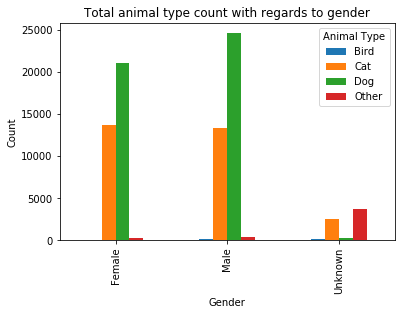

In [50]:
pd.crosstab(sql_df['Sex'],sql_df['Animal Type']).plot(kind='bar')  #cross tab gender and animal type
plt.title('Total animal type count with regards to gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('pur_fre_pout_bar')

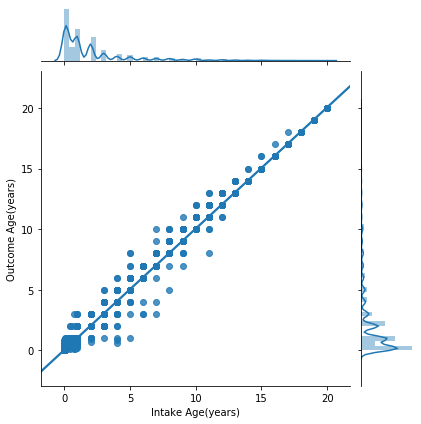

In [51]:
# viewing distribution and scatterplot amoung intake and outcome age in years.
sns.jointplot(x= 'Intake Age(years)', y= 'Outcome Age(years)', data= sql_df, kind= 'reg')

In [52]:
sqlite_connection.close()        # closing database connection